# Plots For Data

### 0. Pre Processing For Delhi.csv

In [26]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import csv
import datetime as dt

plt.rcParams["figure.figsize"] = (50,10)

col_names = {} #col index to name
columns = {} # col name to list
with open("./data/Delhi.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0

    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            i=0
            for s in row:
                col_names[i] = s
                columns[s]=[]
                i += 1
            line_count += 1
        else:
            i=0
            for s in row:
                columns[col_names[i]].append(s if i == 0 else float(s))
                i += 1
            line_count += 1
    print(f'Processed {line_count} lines.')

columns["date"] = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in columns["date"]]

Column names are date, Max Temp (c), Min Temp (c), Avg Temp (c), Snow (cm), Sun Time (Hours), UV Index, Total Precipitation (MM), Avg Pressure (P), Avg Humidity (%), Avg Cloud Cover, Avg Resultant Wind vector [E](km/h), Avg Resultant Wind vector [N](km/h)
Processed 4654 lines.


### 1. Date vs Avg Temp

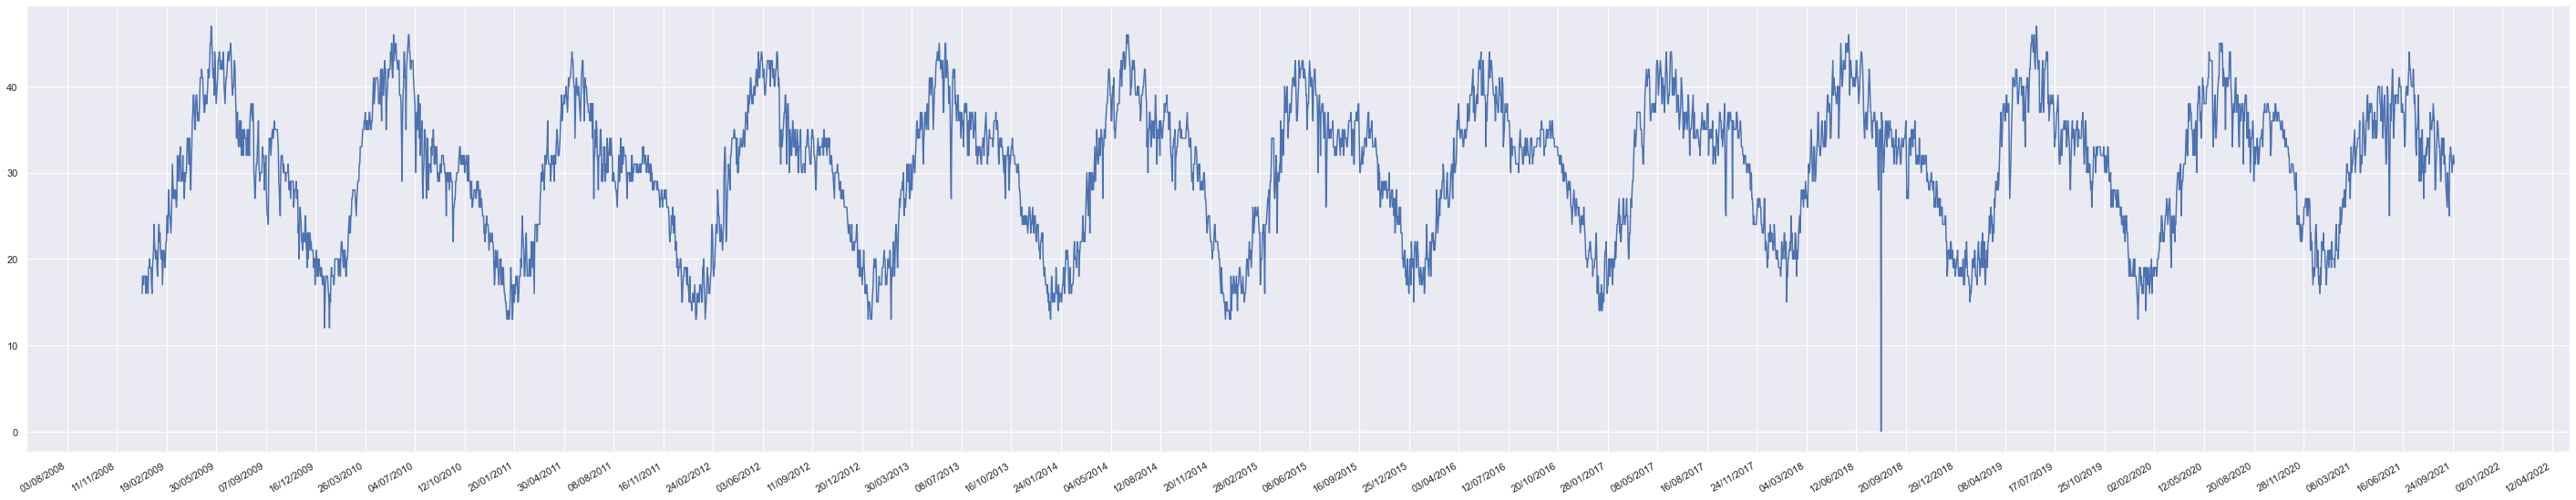

In [27]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(columns["date"],columns["Avg Temp (c)"])
plt.gcf().autofmt_xdate()

### 2. Date vs UV

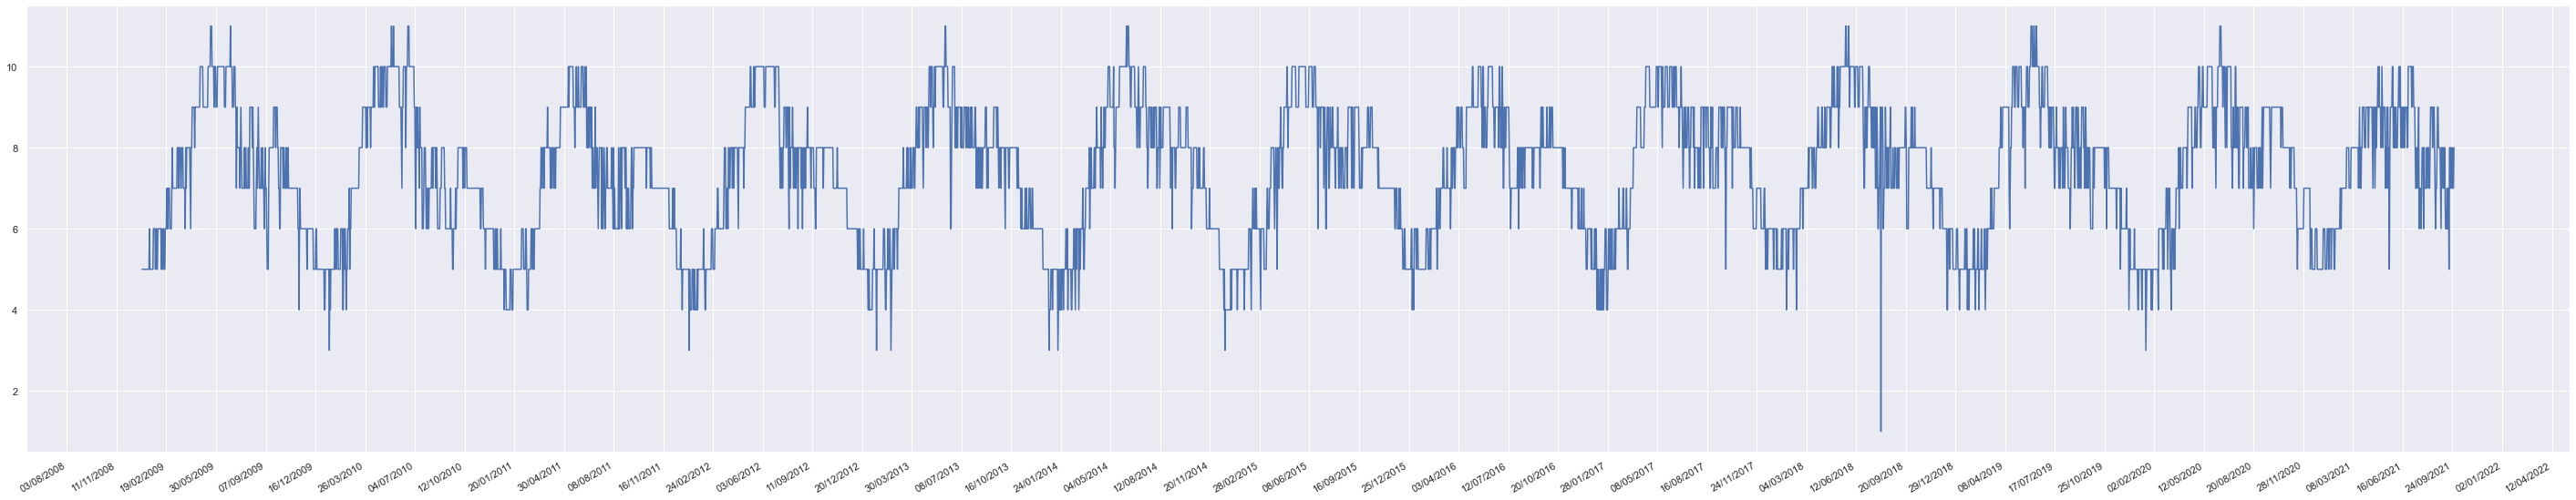

In [28]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(columns["date"],columns["UV Index"])
plt.gcf().autofmt_xdate()

### 3. Date vs Total Percip

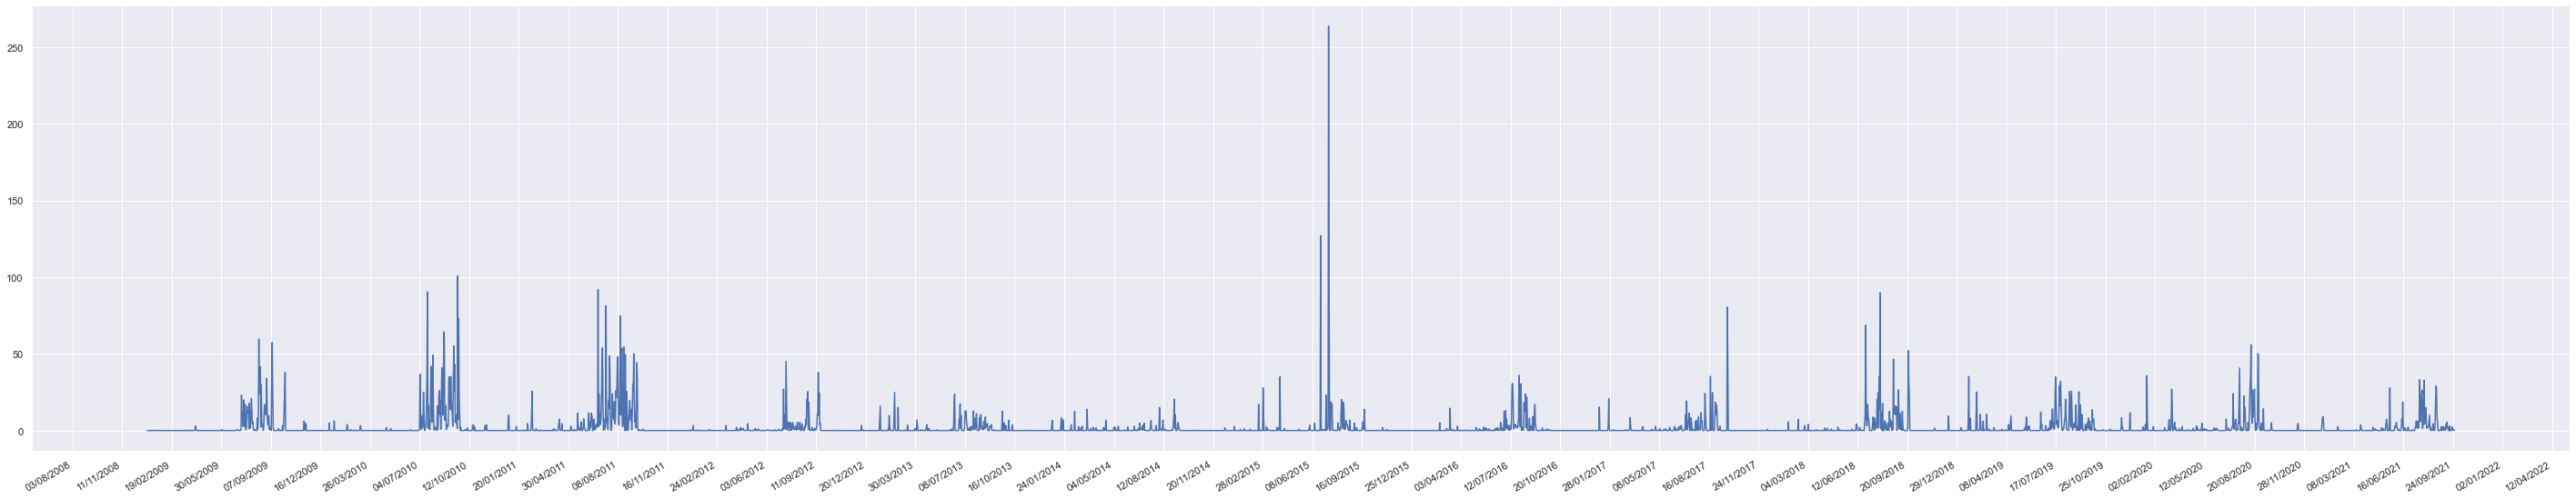

In [29]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(columns["date"],columns["Total Precipitation (MM)"])
plt.gcf().autofmt_xdate()

### 4. Date vs Pressure

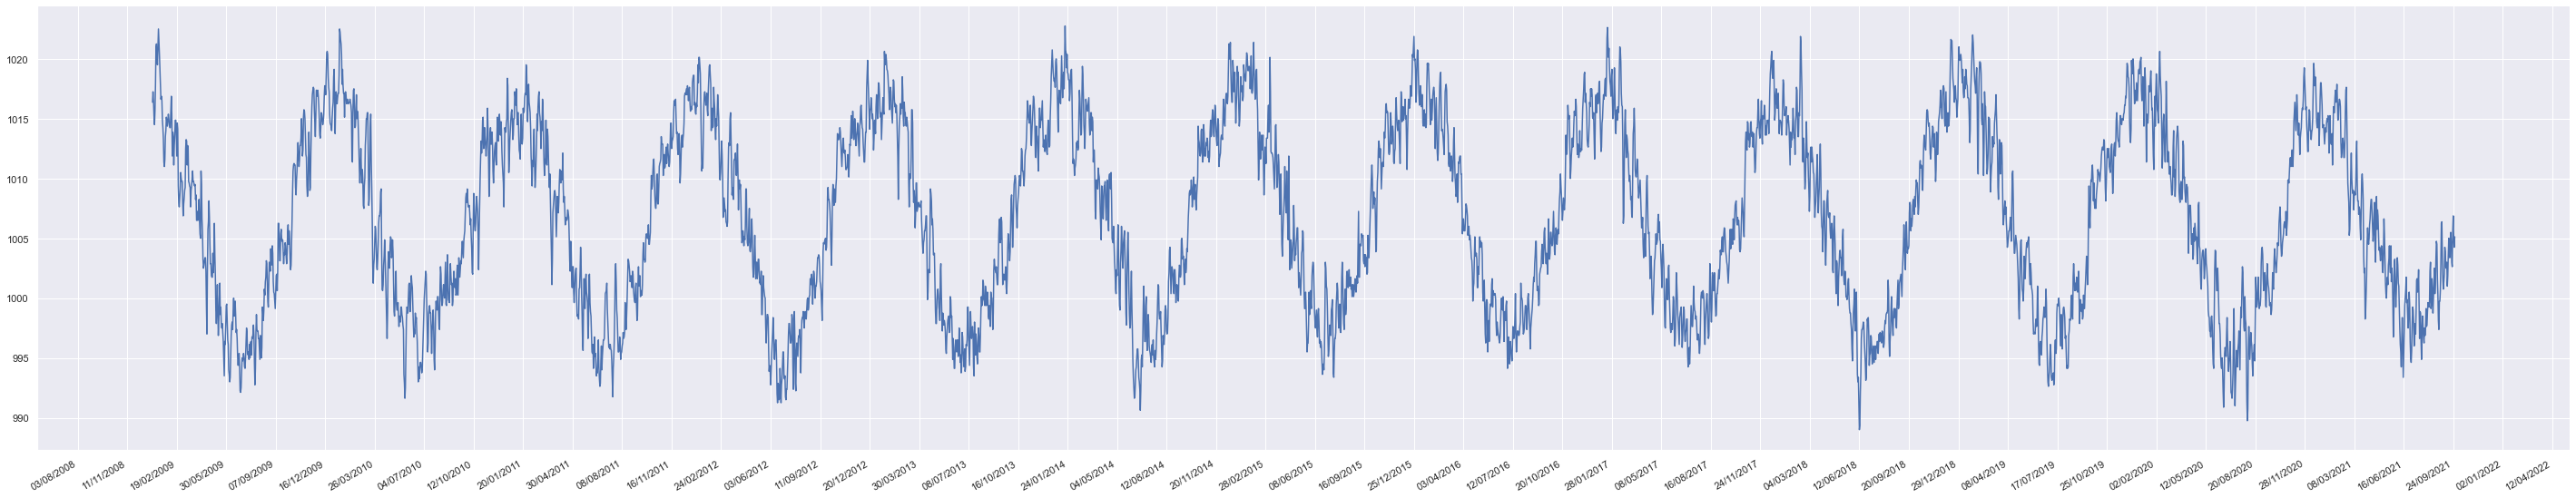

In [30]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(columns["date"],columns["Avg Pressure (P)"])
plt.gcf().autofmt_xdate()

### 5. Date vs Humidity

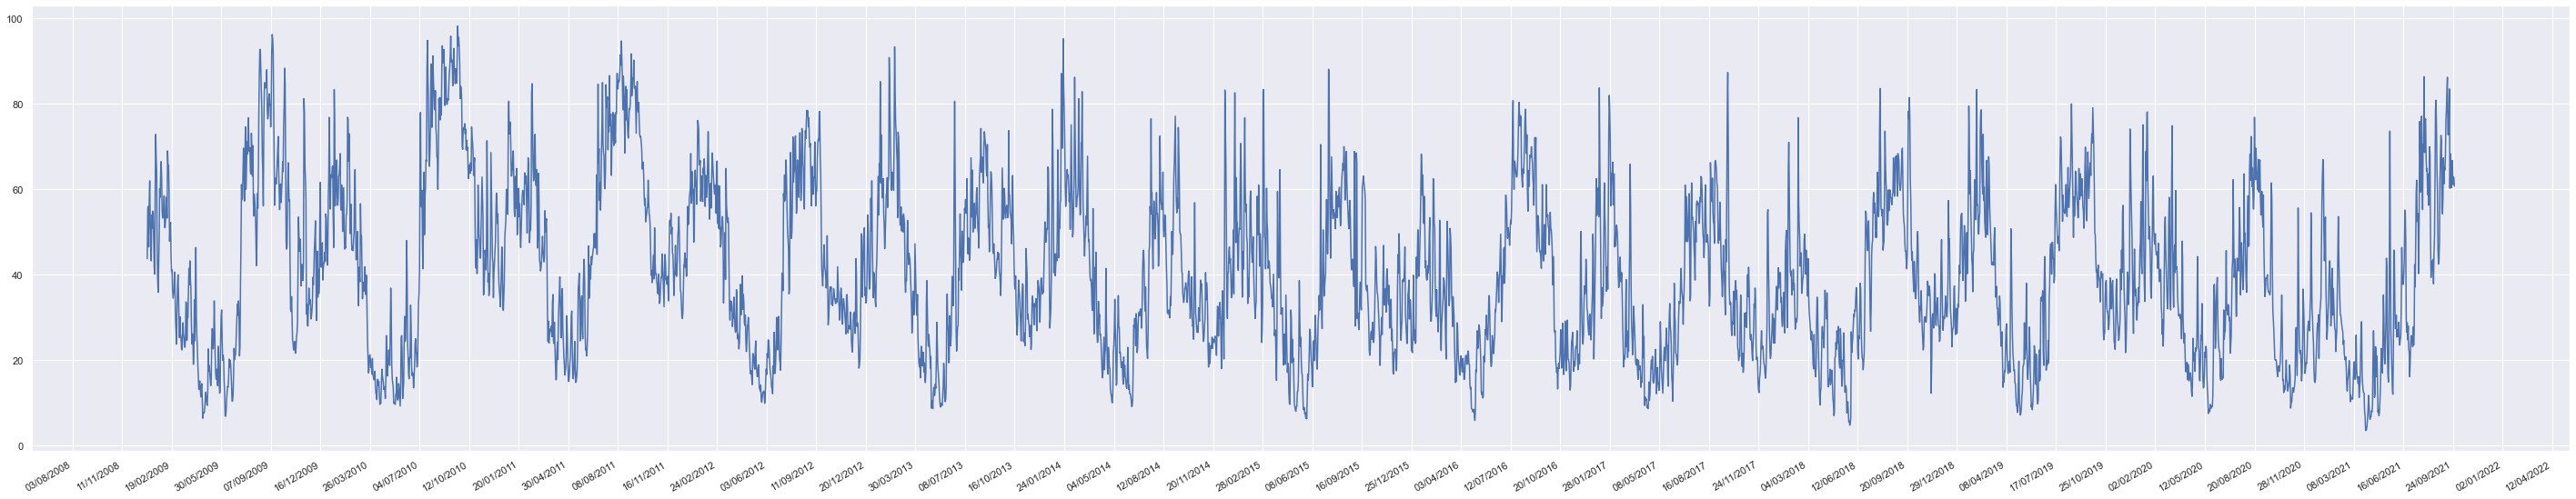

In [31]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(columns["date"],columns["Avg Humidity (%)"])
plt.gcf().autofmt_xdate()


### 6. Date vs Avg Cloud Cover

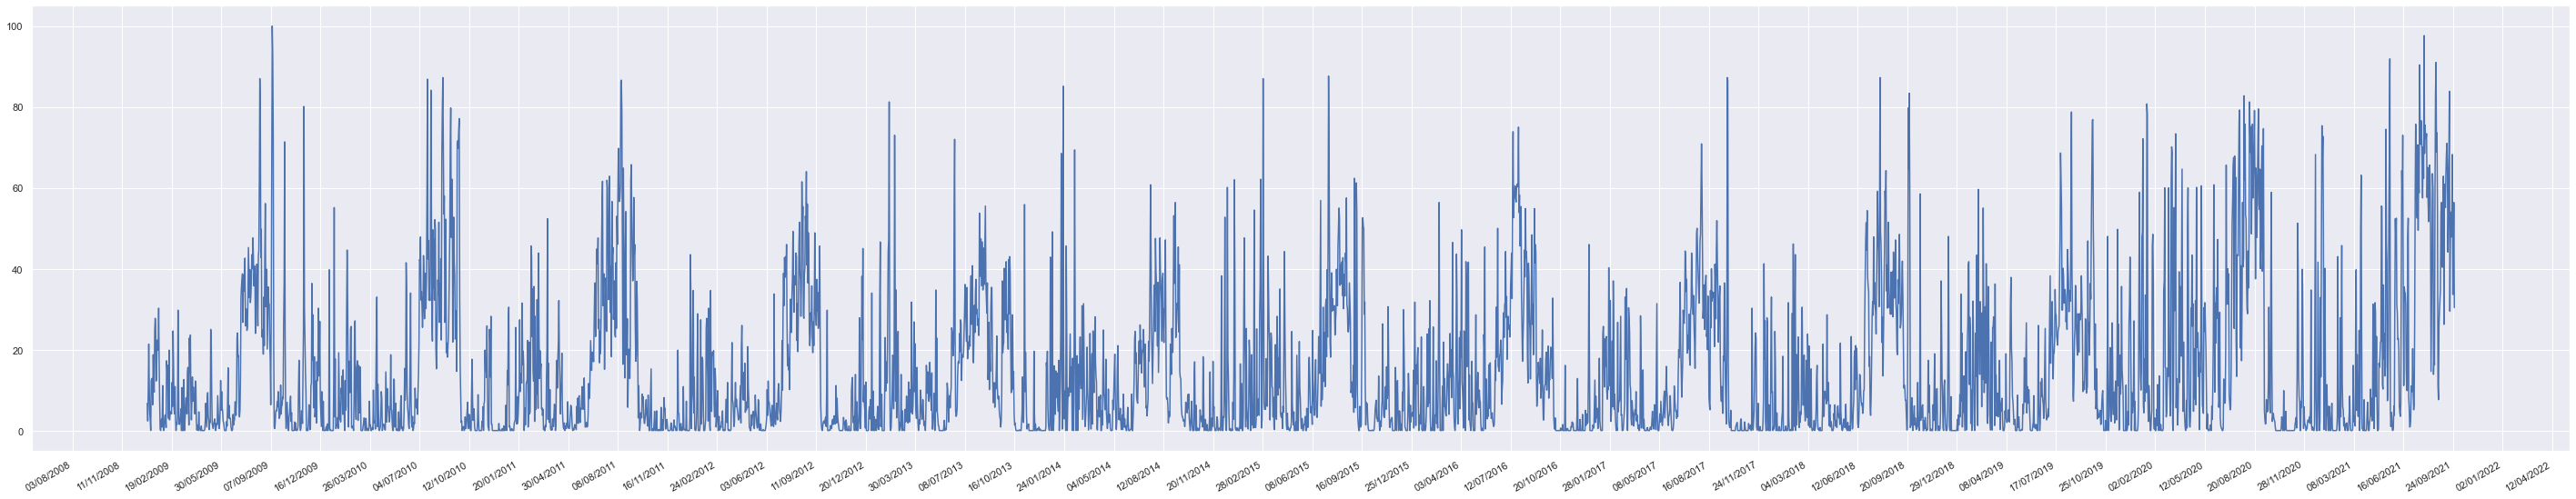

In [32]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(columns["date"],columns["Avg Cloud Cover"])
plt.gcf().autofmt_xdate()

### 7. Date vs Avg resultant wind vector [E]

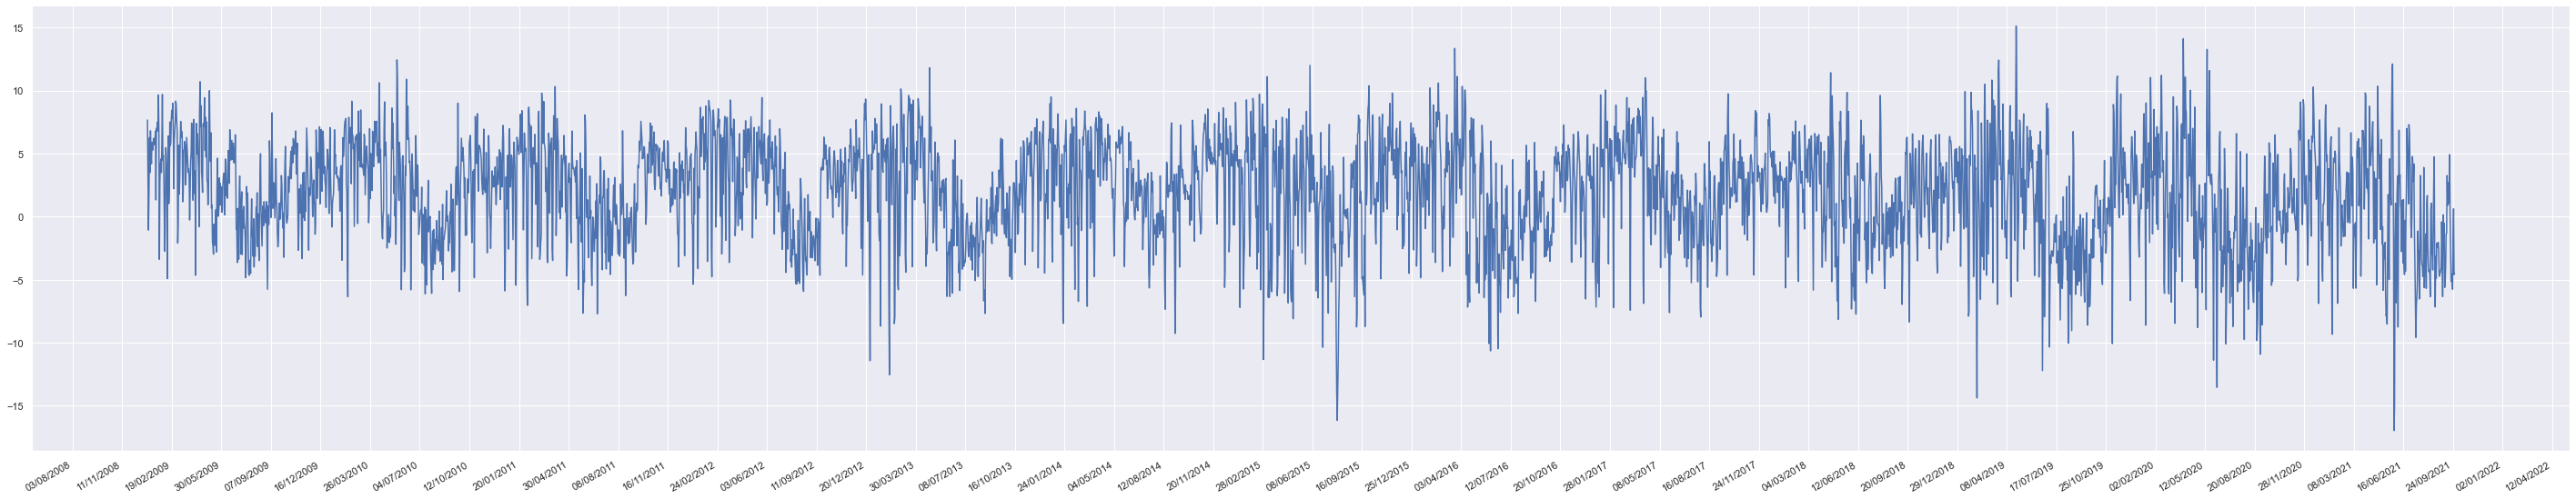

In [33]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(columns["date"],columns["Avg Resultant Wind vector [E](km/h)"])
plt.gcf().autofmt_xdate()

### 8. Date vs Avg resultant wind Dir [N]

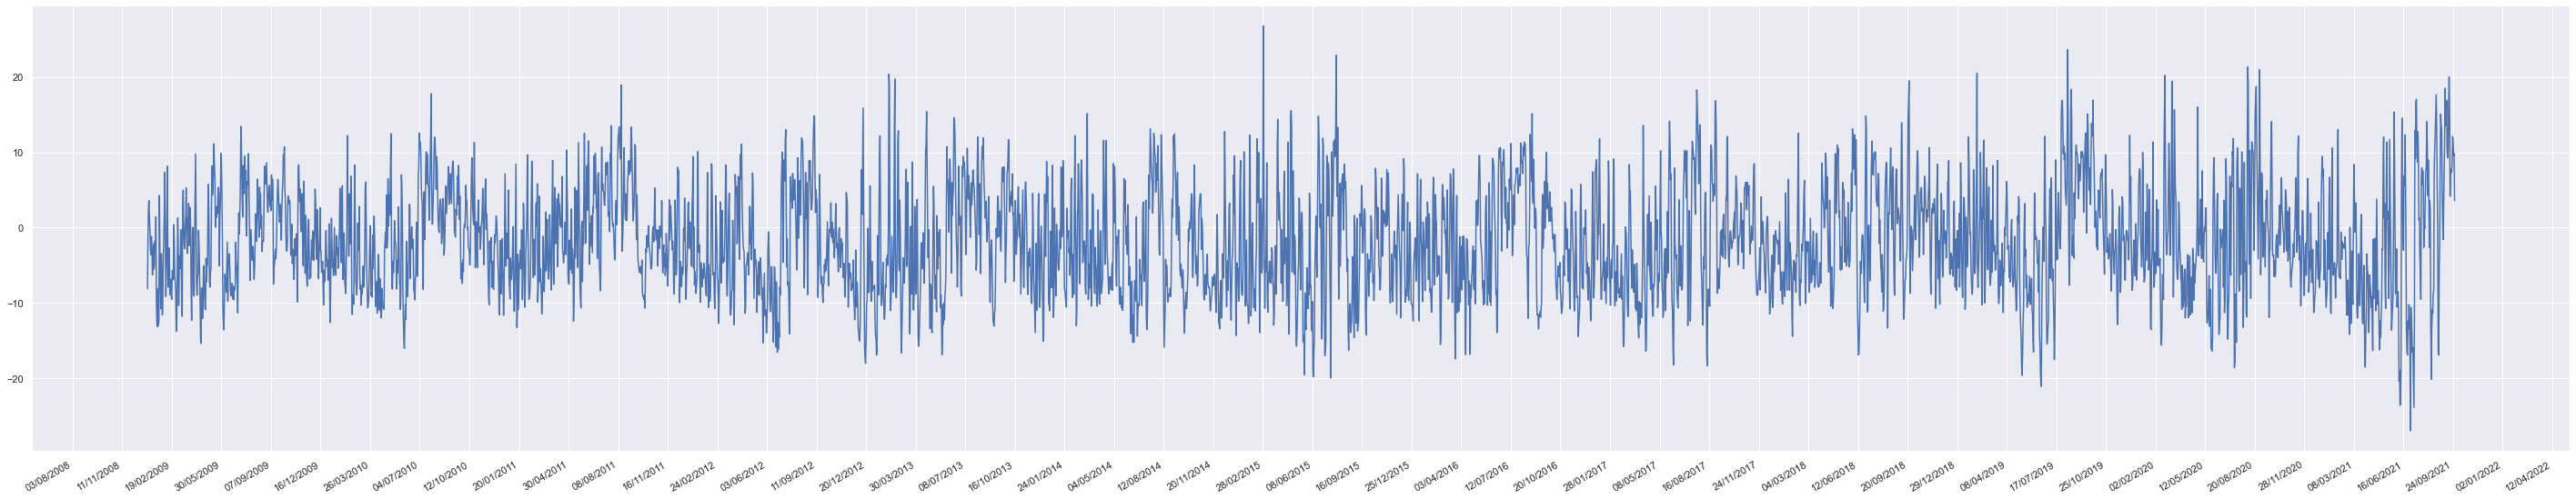

In [34]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(columns["date"],columns["Avg Resultant Wind vector [N](km/h)"])
plt.gcf().autofmt_xdate()

## Importing pandas and numpy

In [ ]:
import pandas as pd
import numpy as np

## Importing Data

In [ ]:
import seaborn as sns
sns.set_theme()
plt.rcParams["figure.figsize"] = (15,10)

files = ["Delhi",
         "East_20", "East_100", "East_500",
         "North_20", "North_100", "North_500",
         "South_20", "South_100", "South_500",
         "West_20", "West_100", "West_500"]
#List containing the data for different cities
data = []

for i in range(len(files)):
    data_ = pd.read_csv("data/" + files[i] + ".csv")

    if i != 0:
        data_.pop("date")
    else:
        rs = np.random.RandomState(0)
        corr = data_.corr()
        sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
                    annot=True)
    data.append(data_)